# Exercise Sheet 08: Softmax Regression

## Exercise 8.2

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse
from sklearn.model_selection import train_test_split

def oneHotIt(Y):
    m = Y.shape[0]
    #Y = Y[:,0]
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHX = np.array(OHX.todense()).T
    return OHX

def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

# TODO: Implement softmax regression. Regularization is optional.

class SoftmaxRegression(object):
    
    def __init__(self):
        self.W = None
        
    def fit(self,X,y):
        
        X, X_val, y, y_val = train_test_split(X, y,test_size=0.1,
                                              random_state=21)
        
        self.W = np.zeros([X.shape[1],len(np.unique(y))])
        lam = 1
        iterations = 100
        learningRate = 1e-5
        
        LOSS_TRAIN = []
        LOSS_EVAL  = []
        
        for i in range(iterations):
            loss,grad = self.loss(X,y,lam)
            LOSS_TRAIN.append(loss)
            lossval,gradval = self.loss(X_val,y_val,lam)
            LOSS_EVAL.append(lossval)
    
            self.W = self.W - (learningRate * grad)
        
        return LOSS_TRAIN, LOSS_EVAL
        
        
    def loss(self, X, y, lam):
        m = X.shape[0]
        y_mat = oneHotIt(y)
        scores = X@self.W
        h = softmax(scores)
        loss = (-1 / m) * np.sum(y_mat * np.log(h)) + (lam/2)*np.sum(self.W*self.W)
        grad = (-1 / m) * X.T @(y_mat - h) + lam*self.W
        return loss, grad
        
    def predict(self, X):
        H = softmax(X@self.W)
        return np.argmax(H,axis=1)
        
    def evaluate(self, X, y):
        prediction = self.predict(X)
        acc = sum(prediction == y) / float(len(y))
        return acc


## Exercise 8.3

In [0]:
X_train = X_train.reshape( *X_train.shape[:1],-1)
X_test = X_test.reshape( *X_test.shape[:1],-1)

def plot_mnist(x):
    """ Plot an mnist image.
        Input:
            x      784-dim. vector representing a grayscale image of size 28 x 28.
    """
    img = np.reshape(x,(28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

Test Accuracy = 0.9046
Train Accuracy = 0.8973333333333333


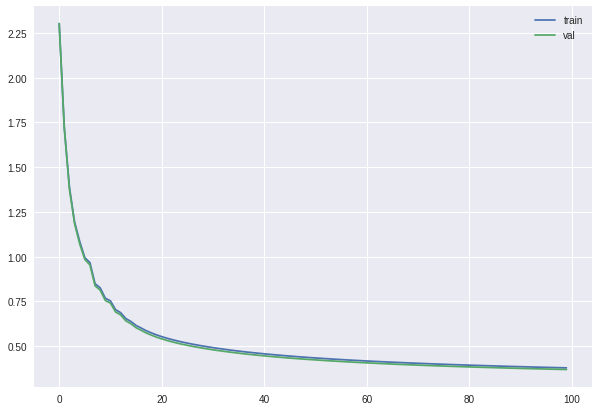

In [45]:
classifier = SoftmaxRegression()

LOSS_TRAIN, LOSS_EVAL = classifier.fit(X_train,y_train)
# TODO: plot boht loss curves
plt.figure(figsize=(10,7))
plt.plot(LOSS_TRAIN, label='train')
plt.plot(LOSS_EVAL,label='val')
plt.legend()

acc_test = classifier.evaluate(X_test,y_test)
acc_train = classifier.evaluate(X_train,y_train)
print('Test Accuracy =',acc_test)
print('Train Accuracy =',acc_train)

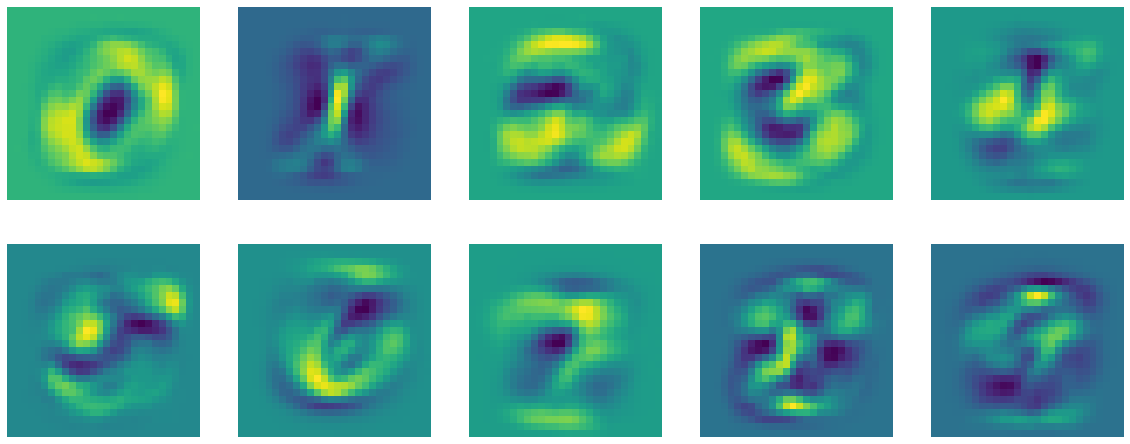

In [46]:
weights = classifier.W
plt.figure(figsize=(20,8))
for n in range(10):
  plt.subplot(2,5,n+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(scipy.reshape(weights[:,n],[28,28]),cmap='viridis')